In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
#
# img = mpimg.imread('road.jpg')
# cropped_array = img[20:img.shape[0]-20, 20:img.shape[1]-20, :]
# padded_array = np.pad(cropped_array, ((20, 20), (20, 20), (0, 0)))
# # padded_array=padded_array[...,::-1]
# # plt.imshow(cv2.cvtColor(padded_array, cv2.COLOR_BGR2RGB))
# plt.imshow(padded_array)
# plt.show()
# print(img.shape)
# print(padded_array.shape)
# print(img.astype)

In [22]:
def border(img):
    x=1
    cropped_array = img[x:img.shape[0]-x, x:img.shape[1]-x, :]
    return np.pad(cropped_array, ((x, x), (x, x), (0, 0)))

In [23]:
from operator import add
from functools import reduce

def split4(image):
    half_split = np.array_split(image, 2)
    print(half_split[0].shape)
    res = map(lambda x: np.array_split(x, 2, axis=1), half_split)
    print(res)
    return reduce(add, res)

In [24]:
def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

In [25]:
def concatenate4(north_west, north_east, south_west, south_east):
    top = np.concatenate((north_west, north_east), axis=1)
    bottom = np.concatenate((south_west, south_east), axis=1)
    return np.concatenate((top, bottom), axis=0)

In [26]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
            .swapaxes(1, 2)
            .reshape(-1, nrows, ncols))

In [27]:
def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

class QuadTree:

    def insert(self, img,matrix,level = 0):
        self.level = level
        #self.mean = calculate_mean(img).astype(int)
        #self.resolution = (img.shape[0], img.shape[1])
        self.img=img
        self.final = True

        if not checkEqual(matrix):
            split_img = split4(img)

            self.final = False

            n_w, n_e, s_w, s_e =  split(matrix, matrix.shape[0]//2, matrix.shape[1]//2)

            self.north_west = QuadTree().insert(split_img[0],n_w, level + 1)
            self.north_east = QuadTree().insert(split_img[1],n_e, level + 1)
            self.south_west = QuadTree().insert(split_img[2],s_w, level + 1)
            self.south_east = QuadTree().insert(split_img[3],s_e, level + 1)

        return self

    def get_image(self, level):
        if(self.final or self.level == level):
            #return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
            # plt.imshow(self.img)
            # plt.show()
            return border(self.img)

        return concatenate4(
            self.north_west.get_image(level),
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))


    # def update_image(self, level):
    #     if(self.final or self.level == level):
    #         return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
    #         # plt.imshow(self.img)
    #         # plt.show()
    #         # return border(self.img)

In [28]:
# matrix = np.random.randint(2, size=(16,16))
# # matrix = np.random.randint(2, size=(img.shape[0], img.shape[1]))
# matrix = []
#
# with open ("input.txt", "r") as myfile:
#     data = myfile.read().splitlines()
# # print(text)
# for line in data:
#     # print(text)
#     list_of_ints = list(map(int, line))
#     matrix.append(list_of_ints)
# # with open('input.txt', 'r') as f:
# #     lines = f.split("\n")
# #     for line in lines:
# #         # line = f.read().splitlines()
# #         print(line)
# #         print(type(line))
# #         # list_of_ints = list(map(int, line))
# #         list_of_ints = [int(x) for x in line]
# #         # print(list_of_ints)
# #         # matrix.append(list_of_ints)
#
# matrix = np.array(matrix)
# # # # print(input)
# print(matrix)
# print(matrix.shape)


In [29]:
# quadtree = QuadTree().insert(img,matrix)
# plt.imshow(quadtree.get_image(5))
# plt.show()
# plt.imshow(quadtree.get_image(3))
# plt.show()
# plt.imshow(quadtree.get_image(7))
# plt.show()
# plt.imshow(quadtree.get_image(10))
# plt.show()

In [30]:
import socket
import pickle


HEADERSIZE= 10
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((socket.gethostname(), 1234))
# msg = s.recv(8)
# print(msg.decode("utf-8"))

# while True:
#     msg = s.recv(8)
#     print(msg.decode("utf-8"))

full_msg = b''
new_msg=True
msg = s.recv(2048)
if new_msg:
        print(f'new message length: {msg[:HEADERSIZE]}')
        msglen = int(msg[:HEADERSIZE])
        new_msg = False

full_msg += msg
while len(full_msg)-HEADERSIZE<msglen:
    msg = s.recv(2048)
#     if new_msg:
#         print(f'new message length: {msg[:HEADERSIZE]}')
#         msglen = int(msg[:HEADERSIZE])
#         new_msg = False

    full_msg += msg

    if(len(full_msg)-HEADERSIZE==msglen):
        print('full message recvd')
        print(full_msg[HEADERSIZE:])
        d = pickle.loads(full_msg[HEADERSIZE:])
        print(type(d))
#         new_msg = True
        full_msg=b''
        break

# print(full_msg)




new message length: b'2281528   '


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



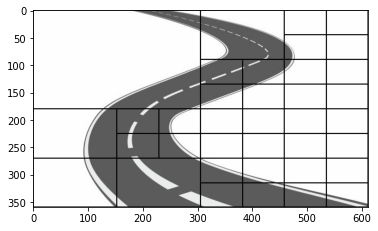

In [35]:
quadtree=d
plt.imshow(quadtree.get_image(3))
plt.show()

In [32]:
# print(quadtree)